In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
pcla_2019 = pd.read_csv('PCLA_2019.csv')

In [3]:
pcla_2019.head()

,emailName,subjectLine,category,sentCount,scheduledDateTimestamp,delivered,deliveredPercent,bounced,bouncedPercent,opens,opensPercent,uniqueOpens,uniqueOpensPercent,clicks,clicksPercent,uniqueClicks,uniqueClicksPercent,initialClicks,initialClicksPercent,conversions,conversionsPercent,unsubscribes,unsubscribesPercent,spamReport,spamReportPercent,sentFromGid
0,Mid December Newsletter,Merry Christmas! Happy New Years! 2020 Events!,General Information,1575,2019-12-17 06:00:00-10:00,1569,99.61905,6,0.38095,1250,79.66858,526,33.52454,144,9.17782,106,20.15209,68,12.92776,14,0.89229,3,0.19120,0,0,9
1,Women Leadership Events,Will you be attending Penn's Women's Leadershi...,General Information,1580,2019-12-11 07:00:00-10:00,1573,99.55696,7,0.44304,1531,97.32994,622,39.54227,102,6.48442,89,14.30868,72,11.57556,9,0.57216,4,0.25429,0,0,9
2,Target Board Meeting 2020,Penn Club LA: 2020 Open Board Meeting,General Information,1581,2019-12-04 07:00:00-10:00,1576,99.68375,5,0.31626,1500,95.17767,653,41.43401,80,5.07614,47,7.19755,46,7.04441,29,1.84010,1,0.06345,0,0,9
3,Penn Greeks Alumni Social,Penn Greeks Alumni Social,General Information,1581,2019-11-27 07:00:00-10:00,1576,99.68375,5,0.31626,1281,81.28173,586,37.18274,51,3.23604,37,6.31399,34,5.80205,6,0.38071,1,0.06345,0,0,9
4,Penn Libraries Fake News In Digital Age Discus...,Special PCLA Invitation to Cocktails with Vice...,General Information,356,2019-11-22 07:00:00-10:00,356,100.00000,0,0.00000,349,98.03371,133,37.35955,11,3.08989,4,3.00752,4,3.00752,2,0.56180,0,0.00000,0,0,9


In [4]:
df_19 = pcla_2019.drop(columns=['spamReport', 'category','spamReportPercent','sentFromGid', 'bounced', 'bouncedPercent', 'category', 'emailName','deliveredPercent', 'unsubscribesPercent','sentCount', 'initialClicks', 'initialClicksPercent', 'conversionsPercent', 'opensPercent','uniqueOpensPercent','clicksPercent','uniqueClicksPercent', 'unsubscribes'])
df_19.head()

,subjectLine,scheduledDateTimestamp,delivered,opens,uniqueOpens,clicks,uniqueClicks,conversions
0,Merry Christmas! Happy New Years! 2020 Events!,2019-12-17 06:00:00-10:00,1569,1250,526,144,106,14
1,Will you be attending Penn's Women's Leadershi...,2019-12-11 07:00:00-10:00,1573,1531,622,102,89,9
2,Penn Club LA: 2020 Open Board Meeting,2019-12-04 07:00:00-10:00,1576,1500,653,80,47,29
3,Penn Greeks Alumni Social,2019-11-27 07:00:00-10:00,1576,1281,586,51,37,6
4,Special PCLA Invitation to Cocktails with Vice...,2019-11-22 07:00:00-10:00,356,349,133,11,4,2


In [5]:
df_19 = df_19.dropna()
#df_19.set_index('subjectLine', inplace = True)
df_19.head()

,subjectLine,scheduledDateTimestamp,delivered,opens,uniqueOpens,clicks,uniqueClicks,conversions
0,Merry Christmas! Happy New Years! 2020 Events!,2019-12-17 06:00:00-10:00,1569,1250,526,144,106,14
1,Will you be attending Penn's Women's Leadershi...,2019-12-11 07:00:00-10:00,1573,1531,622,102,89,9
2,Penn Club LA: 2020 Open Board Meeting,2019-12-04 07:00:00-10:00,1576,1500,653,80,47,29
3,Penn Greeks Alumni Social,2019-11-27 07:00:00-10:00,1576,1281,586,51,37,6
4,Special PCLA Invitation to Cocktails with Vice...,2019-11-22 07:00:00-10:00,356,349,133,11,4,2


In [7]:
timeStamp = df_19['scheduledDateTimestamp']
print(timeStamp)

0     2019-12-17 06:00:00-10:00
1     2019-12-11 07:00:00-10:00
2     2019-12-04 07:00:00-10:00
3     2019-11-27 07:00:00-10:00
4     2019-11-22 07:00:00-10:00
5     2019-11-19 11:00:00-10:00
6     2019-10-24 07:00:00-10:00
7     2019-10-16 06:00:00-10:00
8     2019-10-15 08:00:00-10:00
9     2019-09-17 06:00:00-10:00
10    2019-09-10 07:00:00-10:00
11    2019-08-28 06:00:00-10:00
12    2019-08-19 07:00:00-10:00
13    2019-08-06 08:00:00-10:00
14    2019-07-18 07:00:00-10:00
15    2019-07-16 05:00:00-10:00
16    2019-07-11 06:00:00-10:00
17    2019-06-18 05:00:00-10:00
18    2019-06-11 05:00:00-10:00
19    2019-05-31 17:00:00-10:00
20    2019-05-23 05:00:00-10:00
21    2019-05-09 08:00:00-10:00
22    2019-05-06 21:00:00-10:00
23    2019-05-03 06:00:00-10:00
24    2019-04-30 17:00:00-10:00
25    2019-04-29 07:00:00-10:00
26    2019-04-22 21:00:00-10:00
27    2019-04-18 05:00:00-10:00
28    2019-04-11 06:00:00-10:00
29    2019-04-08 21:00:00-10:00
30    2019-04-05 05:00:00-10:00
31    20

In [8]:
split_stamp = firstStamp.split(' ')
print(split_stamp)

['2019-12-17', '06:00:00-10:00']


In [9]:
stampDay = pd.to_datetime(split_stamp[0])
print(stampDay.day_name())

Tuesday


In [10]:
print(stampDay.dayofweek)

1


In [11]:
stampTime = split_stamp[1]
print(stampTime)

06:00:00-10:00


In [12]:
timeSplit = stampTime.split('-')
print(timeSplit)

['06:00:00', '10:00']


In [13]:
finalTime = timeSplit[0]
print(finalTime)

06:00:00


In [15]:
newTime = finalTime.split(':')
print(newTime)
time = int(newTime[0])
print(time)

['06', '00', '00']
6


In [17]:
len(timeStamp)

41

In [19]:
type(timeStamp)

pandas.core.series.Series

In [8]:
days = []
time = []
for index, value in timeStamp.items():
  #print(f"Index : {index}, Value : {value}")
  splitStamp = value.split(' ')
  #print(splitStamp)
  dayStamp = pd.to_datetime(splitStamp[0]).dayofweek
  days.append(dayStamp)
  time_stamp = int(splitStamp[1].split('-')[0].split(':')[0])
  time.append(time_stamp)

print(days)
print("=========")
print(time)

[1, 2, 2, 2, 4, 1, 3, 2, 1, 1, 1, 2, 0, 1, 3, 1, 3, 1, 1, 4, 3, 3, 0, 4, 1, 0, 0, 3, 3, 0, 4, 0, 6, 2, 0, 1, 3, 1, 3, 3, 2]
[6, 7, 7, 7, 7, 11, 7, 6, 8, 6, 7, 6, 7, 8, 7, 5, 6, 5, 5, 17, 5, 8, 21, 6, 17, 7, 21, 5, 6, 21, 5, 9, 17, 21, 6, 7, 18, 8, 18, 11, 9]


In [36]:
#New Model
new_x = days
new_y = df_19['conversions']
new_x = np.array(new_x)
updated_x = new_x.reshape(-1,1)
#print(new_x)
#print(type(new_x))
#print(new_y)
#print(new_y[0])

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(updated_x, new_y, test_size = 0.2, random_state = 0)
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
#print(y_test)
y_pred = regressor.predict(X_test)
#print(y_pred)

#Monday
print("Monday conversions expectation: ", regressor.predict([[0]]))
#Tuesday
print("Tuesday conversions expectation: ",regressor.predict([[1]]))
#Wednesday
print("Wednesday conversions expectation: ",regressor.predict([[2]]))
#Thursday
print("Thursday conversions expectation: ",regressor.predict([[3]]))
#Friday
print("Friday conversions expectation: ",regressor.predict([[4]]))
#Saturday
print("Saturday conversions expectation: ",regressor.predict([[5]]))
#Sunday
print("Sunday conversions expectation: ",regressor.predict([[6]]))

Monday conversions expectation:  [11.06]
Tuesday conversions expectation:  [9.06]
Wednesday conversions expectation:  [7.06]
Thursday conversions expectation:  [5.06]
Friday conversions expectation:  [3.06]
Saturday conversions expectation:  [1.06]
Sunday conversions expectation:  [-0.94]


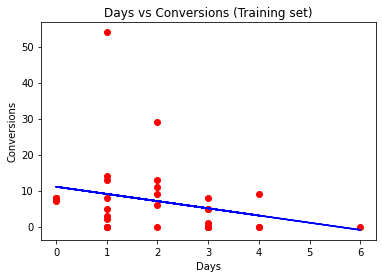

In [41]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Days vs Conversions (Training set)')
plt.xlabel('Days')
plt.ylabel('Conversions')
plt.show()

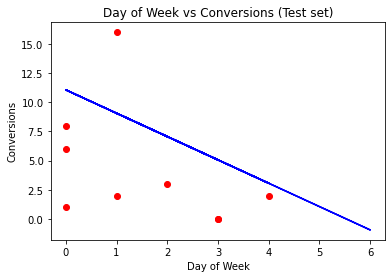

In [42]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Day of Week vs Conversions (Test set)')
plt.xlabel('Day of Week')
plt.ylabel('Conversions')
plt.show()

In [6]:
df_19.describe()

,delivered,opens,uniqueOpens,clicks,uniqueClicks,conversions
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,1933.292683,1343.414634,628.463415,85.853659,67.170732,6.439024
std,1976.386883,1289.433402,614.567169,123.781978,97.484846,9.672251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,851.000000,743.000000,304.000000,20.000000,15.000000,0.000000
50%,1533.000000,1186.000000,520.000000,47.000000,37.000000,5.000000
75%,1576.000000,1500.000000,673.000000,95.000000,75.000000,8.000000
max,7474.000000,5459.000000,2429.000000,564.000000,475.000000,54.000000


In [7]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   subjectLine             41 non-null     object
 1   scheduledDateTimestamp  41 non-null     object
 2   delivered               41 non-null     int64 
 3   opens                   41 non-null     int64 
 4   uniqueOpens             41 non-null     int64 
 5   clicks                  41 non-null     int64 
 6   uniqueClicks            41 non-null     int64 
 7   conversions             41 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 2.9+ KB


In [8]:
df_19.corr()

,delivered,opens,uniqueOpens,clicks,uniqueClicks,conversions
delivered,1.000000,0.968713,0.991701,0.818357,0.826554,0.578862
opens,0.968713,1.000000,0.987183,0.877251,0.876575,0.651888
uniqueOpens,0.991701,0.987183,1.000000,0.841018,0.848360,0.596701
clicks,0.818357,0.877251,0.841018,1.000000,0.991214,0.634404
uniqueClicks,0.826554,0.876575,0.848360,0.991214,1.000000,0.561406
conversions,0.578862,0.651888,0.596701,0.634404,0.561406,1.000000


In [10]:
df_19_new = df_19.drop(columns=['scheduledDateTimestamp', 'subjectLine'])
df_19_new.head()

,delivered,opens,uniqueOpens,clicks,uniqueClicks,conversions
0,1569,1250,526,144,106,14
1,1573,1531,622,102,89,9
2,1576,1500,653,80,47,29
3,1576,1281,586,51,37,6
4,356,349,133,11,4,2


In [11]:
#SPLIT DATASET
X = df_19_new.iloc[:, :-1].values
y = df_19_new.iloc[:, -1].values

In [12]:
print(X)

[[1569 1250  526  144  106]
 [1573 1531  622  102   89]
 [1576 1500  653   80   47]
 [1576 1281  586   51   37]
 [ 356  349  133   11    4]
 [7474 5459 2372  546  371]
 [ 824  563  254   34   28]
 [ 851  743  280   87   74]
 [1559 1355  558  150  130]
 [1554 1467  513  111   85]
 [1555  808  499   47   21]
 [1552 1042  529   33   19]
 [1548 1627  673   95   73]
 [7368 4858 2288  564  475]
 [1533 1332  557  142  113]
 [1531 2080  706   55   37]
 [1533 1028  506   64   51]
 [ 787  598  304   65   58]
 [1523  969  504   15   12]
 [   0    0    0    0    0]
 [2869 1516  821   22   15]
 [7231 4809 2429  321  274]
 [2870 1226  728   32   21]
 [1509 1382  468    7    5]
 [   0    0    0    0    0]
 [  48   69   21   14    8]
 [2874 1552  739   42   30]
 [1517  755  451    5    5]
 [1981 1325  610  122   82]
 [2834 1500  821   40   33]
 [1496  973  458   77   67]
 [1511  909  478   24   23]
 [   0    0    0    0    0]
 [2875 1871  909   66   53]
 [1508 1003  538   47   39]
 [7267 4137 2162  15

In [13]:
print(y)

[14  9 29  6  2 54  8 11  2  3  2  3  8 13  5  8  0  0  0  0  0  5  8  9
  0  1  7  0  0  8  0  6  0 13  8 16  0  5  0  1  0]


In [39]:
print(X[0])

['Merry Christmas! Happy New Years! 2020 Events! ' 1569 1250 526 144 106]


In [14]:
df_19_new.head()

,delivered,opens,uniqueOpens,clicks,uniqueClicks,conversions
0,1569,1250,526,144,106,14
1,1573,1531,622,102,89,9
2,1576,1500,653,80,47,29
3,1576,1281,586,51,37,6
4,356,349,133,11,4,2


In [15]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   subjectLine             41 non-null     object
 1   scheduledDateTimestamp  41 non-null     object
 2   delivered               41 non-null     int64 
 3   opens                   41 non-null     int64 
 4   uniqueOpens             41 non-null     int64 
 5   clicks                  41 non-null     int64 
 6   uniqueClicks            41 non-null     int64 
 7   conversions             41 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 2.9+ KB


In [40]:
'''
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
'''

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 3.21  1.  ]
 [ 1.36 16.  ]
 [ 3.41  8.  ]
 [ 4.66  2.  ]
 [10.77  2.  ]
 [ 1.52  6.  ]
 [ 1.7   0.  ]
 [ 7.41  3.  ]
 [ 1.25  0.  ]]


In [32]:
print(X_test.shape)

(9, 5)
